In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve

In [148]:
df = pd.read_csv("Social_Network_Ads.csv")

In [149]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [150]:
df = df.drop(columns='User ID')

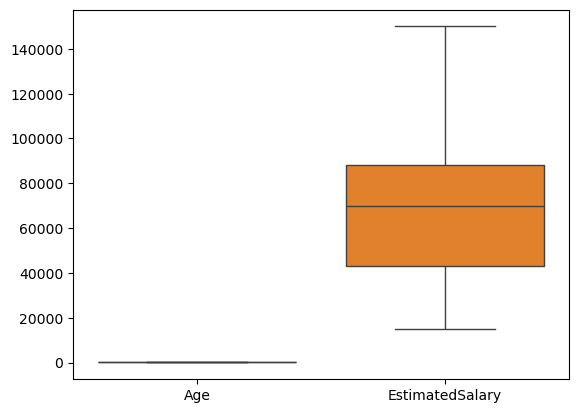

In [151]:
sns.boxplot(data=df[['Age', 'EstimatedSalary']])
plt.show()

In [152]:
df['Gender'] = le.fit_transform(df['Gender'])

In [153]:
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [154]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [172]:
X = df[['Gender','Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [174]:
X.shape

(400, 3)

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [176]:
X_train

array([[     0,     27,  57000],
       [     1,     46,  28000],
       [     0,     39, 134000],
       [     0,     44,  39000],
       [     0,     57,  26000],
       [     1,     32, 120000],
       [     1,     41,  52000],
       [     1,     48,  74000],
       [     1,     26,  86000],
       [     1,     22,  81000],
       [     1,     49,  86000],
       [     0,     36,  54000],
       [     1,     40,  59000],
       [     0,     41,  80000],
       [     1,     26,  16000],
       [     0,     39,  79000],
       [     1,     59, 130000],
       [     1,     42,  64000],
       [     0,     53, 143000],
       [     1,     34, 112000],
       [     0,     57, 122000],
       [     0,     39,  71000],
       [     1,     47,  25000],
       [     1,     24,  19000],
       [     0,     36,  50000],
       [     0,     32, 150000],
       [     0,     48,  29000],
       [     1,     30, 107000],
       [     1,     60,  34000],
       [     1,     38,  61000],
       [  

In [177]:
sc = StandardScaler()

In [178]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [179]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(320, 3)
(80, 3)


In [180]:
X_train_scaled

array([[-1.        , -1.06675246, -0.38634438],
       [ 1.        ,  0.79753468, -1.22993871],
       [-1.        ,  0.11069205,  1.853544  ],
       [-1.        ,  0.60129393, -0.90995465],
       [-1.        ,  1.87685881, -1.28811763],
       [ 1.        , -0.57615058,  1.44629156],
       [ 1.        ,  0.3069328 , -0.53179168],
       [ 1.        ,  0.99377543,  0.10817643],
       [ 1.        , -1.16487283,  0.45724994],
       [ 1.        , -1.55735433,  0.31180264],
       [ 1.        ,  1.0918958 ,  0.45724994],
       [-1.        , -0.18366908, -0.47361276],
       [ 1.        ,  0.20881242, -0.32816546],
       [-1.        ,  0.3069328 ,  0.28271318],
       [ 1.        , -1.16487283, -1.57901222],
       [-1.        ,  0.11069205,  0.25362372],
       [ 1.        ,  2.07309956,  1.73718616],
       [ 1.        ,  0.40505317, -0.18271817],
       [-1.        ,  1.4843773 ,  2.11534913],
       [ 1.        , -0.37990983,  1.21357589],
       [-1.        ,  1.87685881,  1.504

In [181]:
lor = LogisticRegression()

In [182]:
lor.fit(X_train_scaled,y_train)

LogisticRegression()

In [183]:
y_pred = lor.predict(X_test_scaled)

In [192]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [184]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[50  2]
 [ 7 21]]


In [185]:
TN, FP, FN, TP = cm.ravel()
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

TP: 21, FP: 2, TN: 50, FN: 7


In [186]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8875


In [187]:
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.4f}")

Error Rate: 0.1125


In [188]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.9130


In [189]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.7500


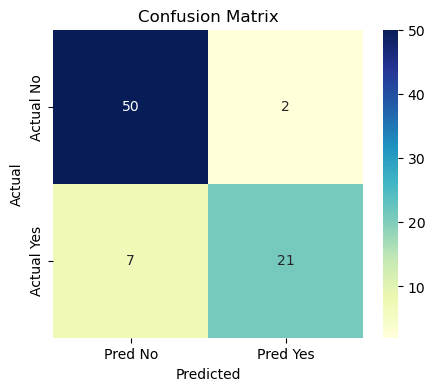

In [190]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Pred No', 'Pred Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [194]:
y_probs = lor.predict_proba(X_test_scaled)[:, 1]

In [197]:
auc = roc_auc_score(y_test, y_probs)
print("AUC-ROC Score:", round(auc, 4))

AUC-ROC Score: 0.9705


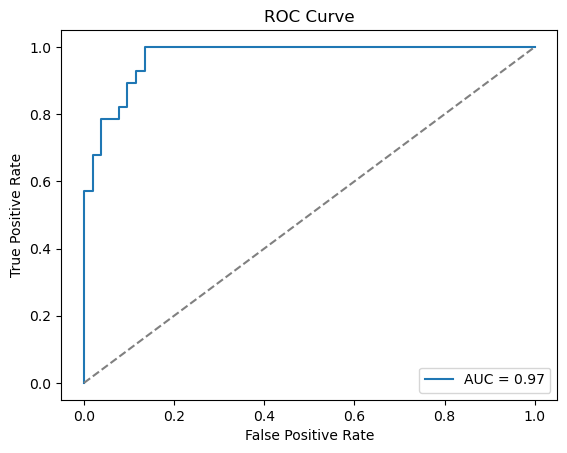

In [198]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()